In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

sns.set(style='white', context='notebook', palette='deep')

In [127]:
data_train=pd.read_csv("train.csv",index_col=0)
data_train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States


In [128]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43957 entries, 0 to 43956
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.0+ MB


In [9]:
data_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [129]:
y_train=pd.read_csv("train_class_labels.csv",index_col=0)
y_train

,income_>50K
0,1
1,0
2,1
3,0
4,0
...,...
43952,1
43953,0
43954,0
43955,0


In [130]:
data_train['income']=y_train
data_train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [131]:
 data_train = data_train.dropna(how='any',axis=0) #removing null values

In [132]:
data_train.shape

(40727, 15)

In [133]:
data_test=pd.read_csv('test (1).csv')
data_test

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,27,Private,302406,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
895,17,Private,218124,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States
896,24,Private,127139,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States
897,35,Private,132879,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States


In [134]:
data_test.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [135]:
data_train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


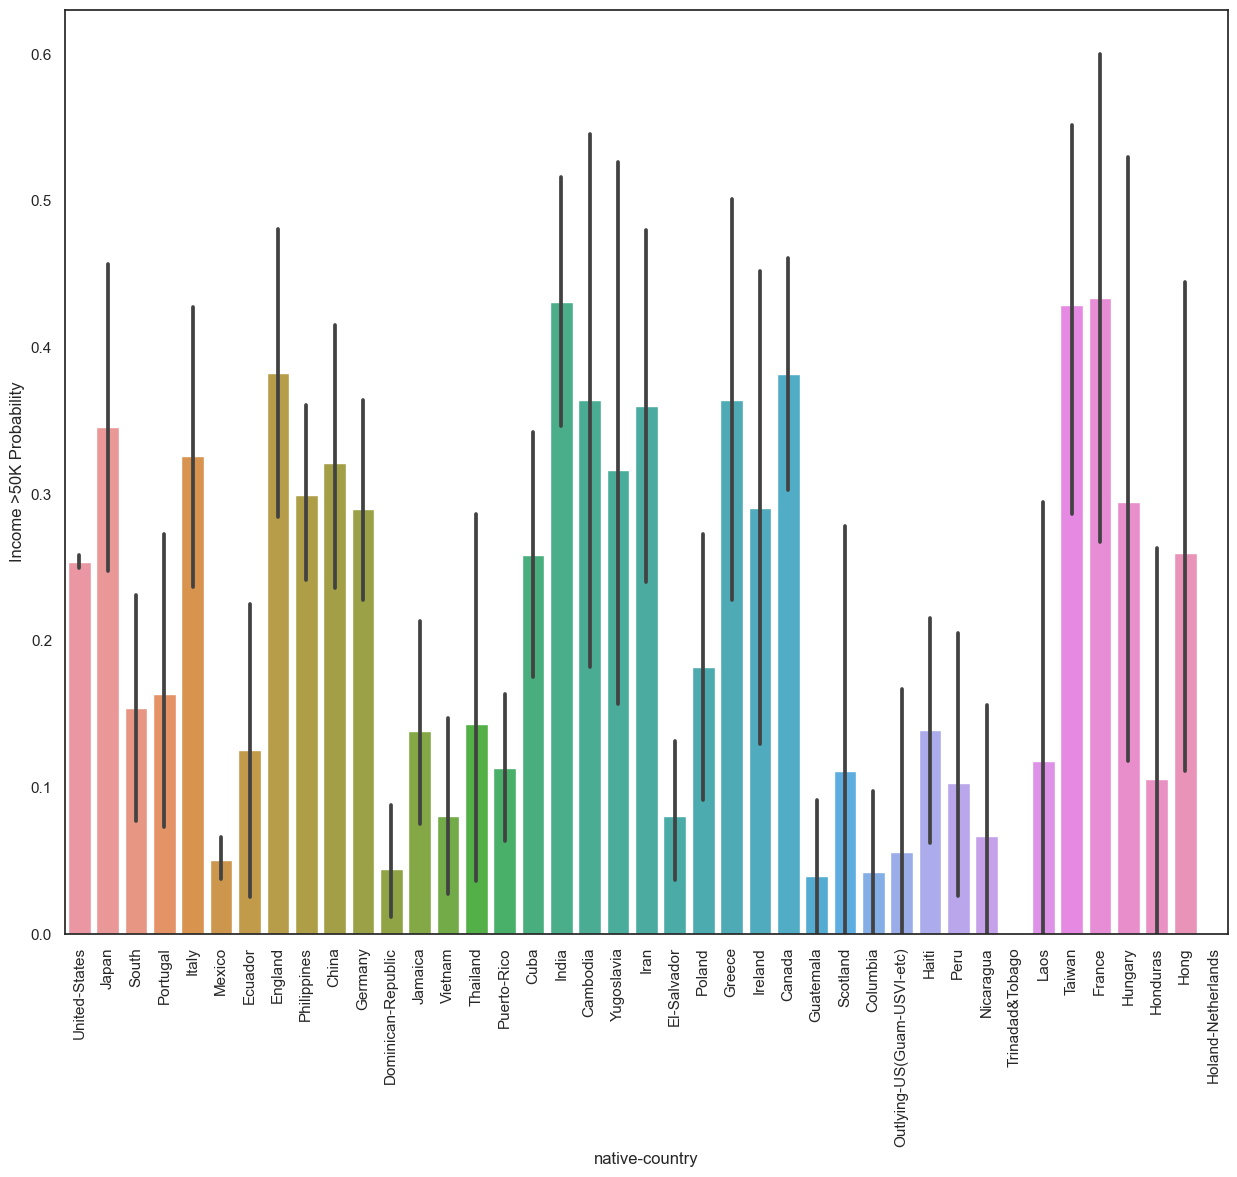

In [137]:
plt.figure(figsize=(15,12))
g = sns.barplot(x="native-country",y="income",data=data_train)
g = g.set_ylabel("Income >50K Probability")
plt.xticks(rotation=90)
plt.savefig("img6.jpg")
plt.show()

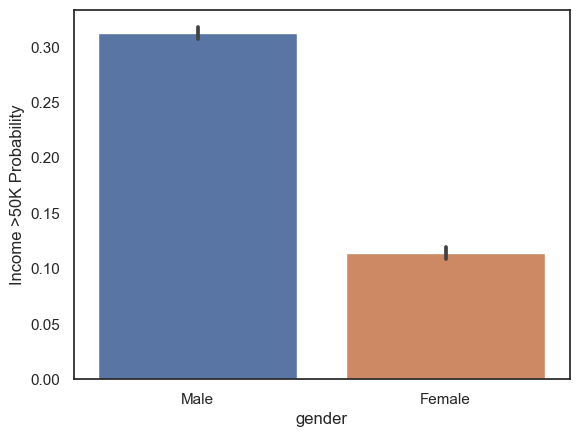

In [138]:
g = sns.barplot(x="gender",y="income",data=data_train)
g = g.set_ylabel("Income >50K Probability")
plt.savefig("img7.jpg")
plt.show()


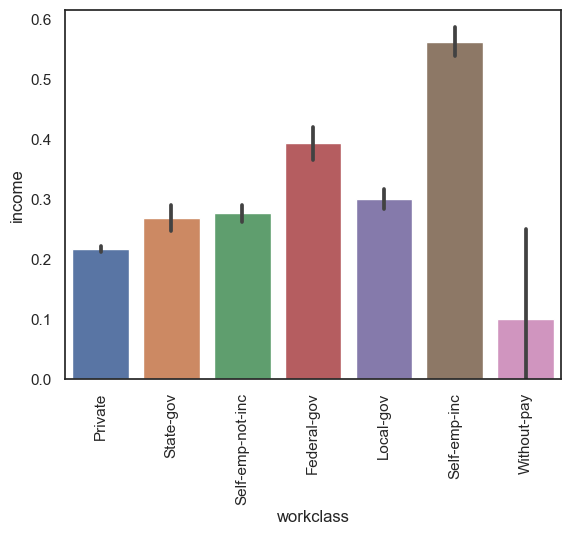

In [148]:
import seaborn as sns
g = sns.barplot(x="workclass",y="income",data=data_train)
# g.despine(left=True)
g.set_xlabel("workclass")
plt.xticks(rotation=90)
plt.show()

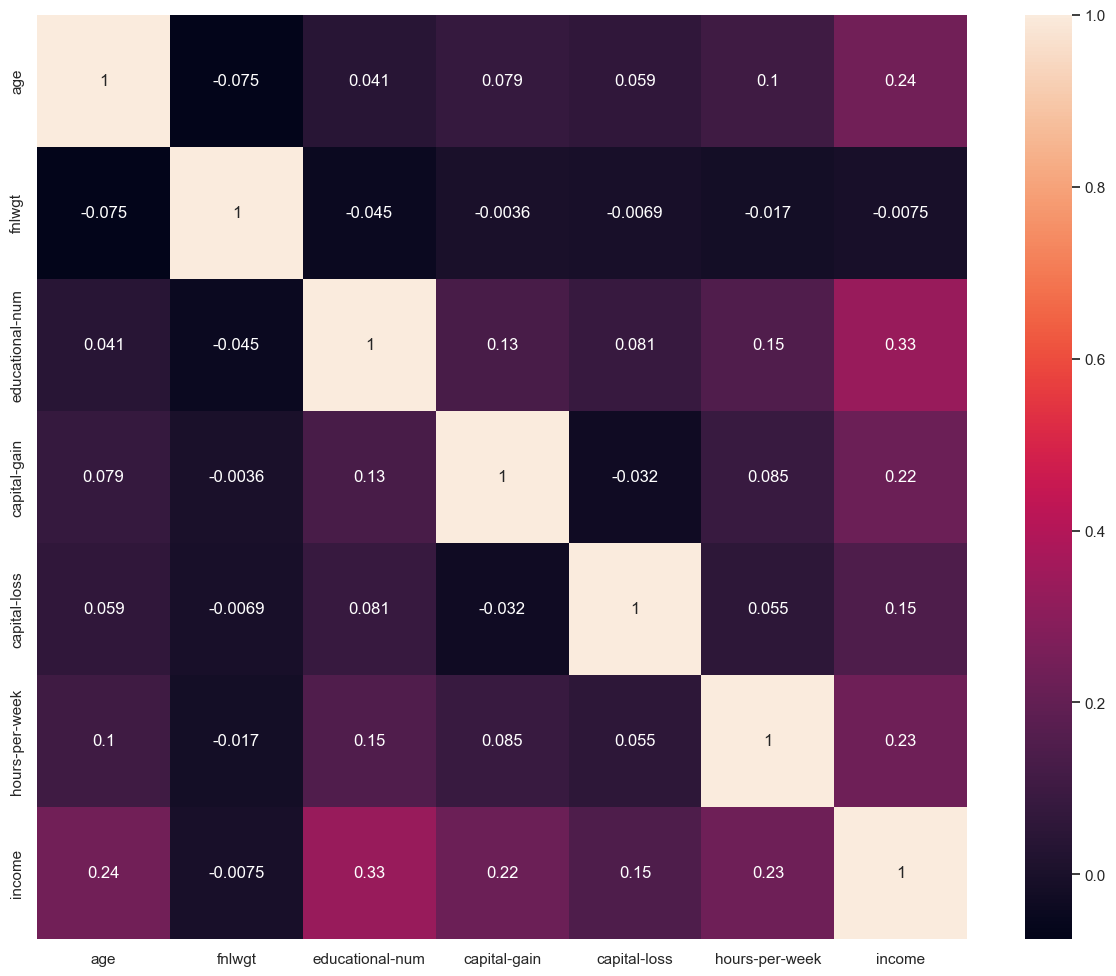

In [149]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(data_train.corr(), annot=True)
plt.show()

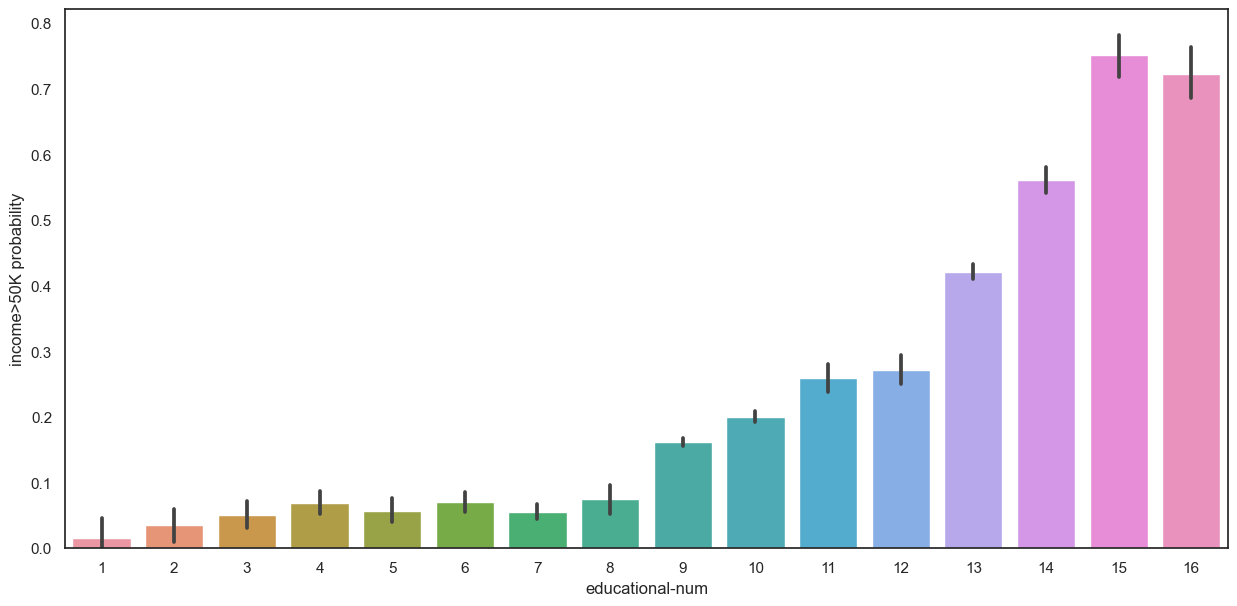

In [153]:
plt.figure(figsize=(15,7))
g = sns.barplot(x="educational-num",y="income",data=data_train)
g.set_ylabel("income>50K probability")
plt.show()

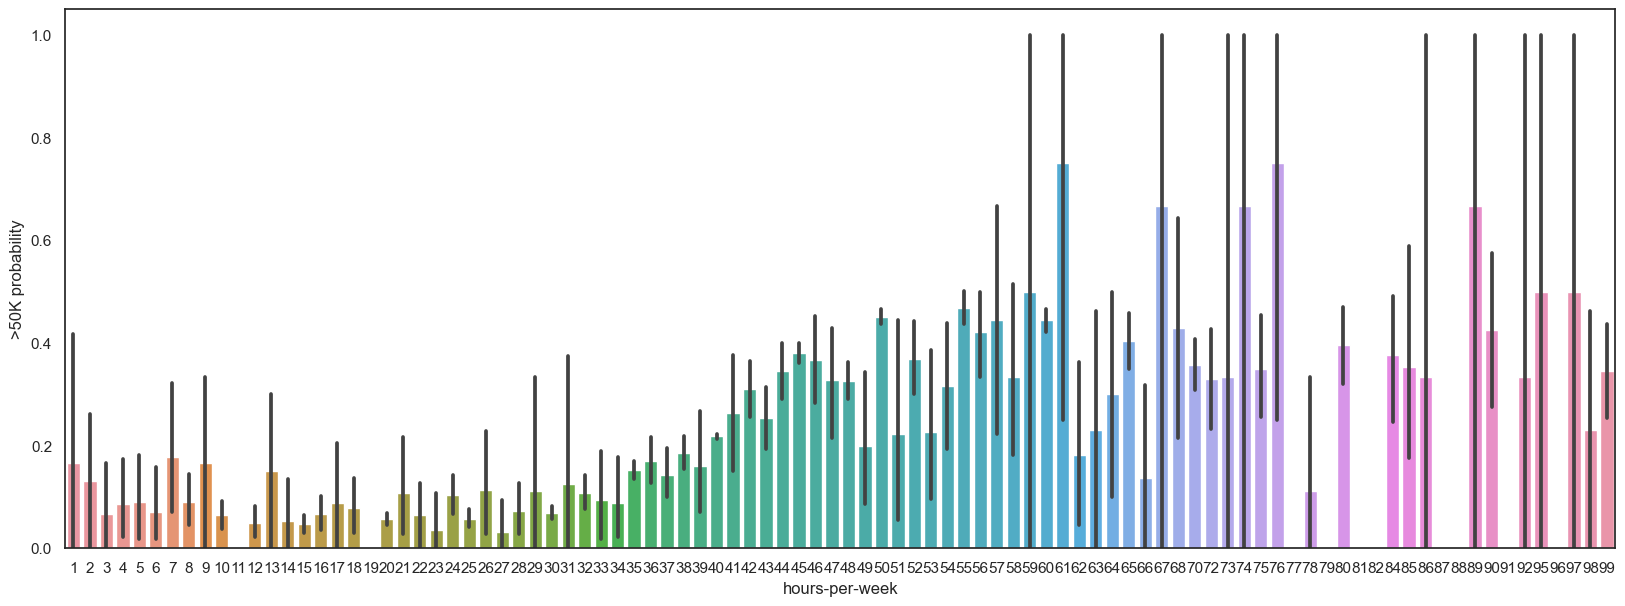

In [156]:
plt.figure(figsize=(20,7))
g  = sns.barplot(x="hours-per-week",y="income",data=data_train)
g.set_ylabel(">50K probability")
plt.show()

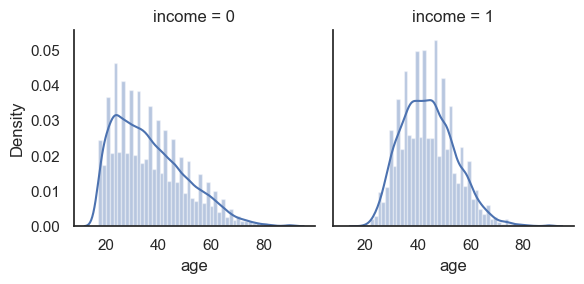

In [158]:
g = sns.FacetGrid(data_train, col='income')
g = g.map(sns.distplot, "age")
plt.show()

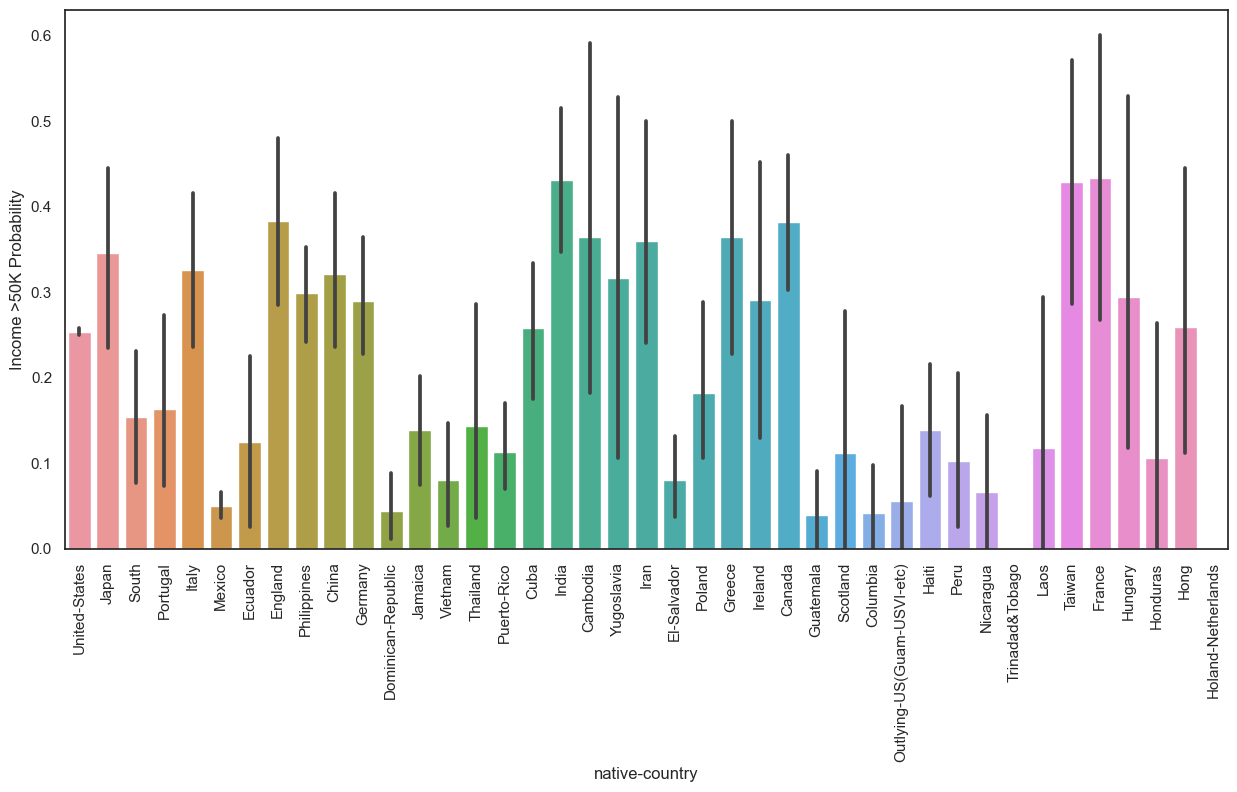

In [160]:
plt.figure(figsize=(15,7))
g = sns.barplot(x="native-country",y="income",data=data_train)
g = g.set_ylabel("Income >50K Probability")
plt.xticks(rotation=90)
plt.show()

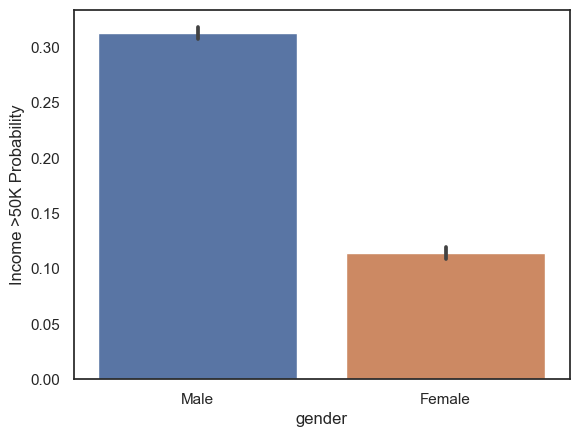

In [162]:
g = sns.barplot(x="gender",y="income",data=data_train)
g = g.set_ylabel("Income >50K Probability")
plt.show()

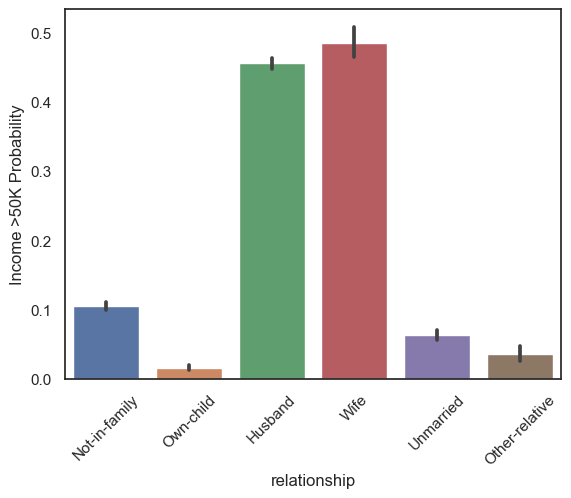

In [164]:
g = sns.barplot(x="relationship",y="income",data=data_train)
g = g.set_ylabel("Income >50K Probability")
plt.xticks(rotation=45)
plt.show()

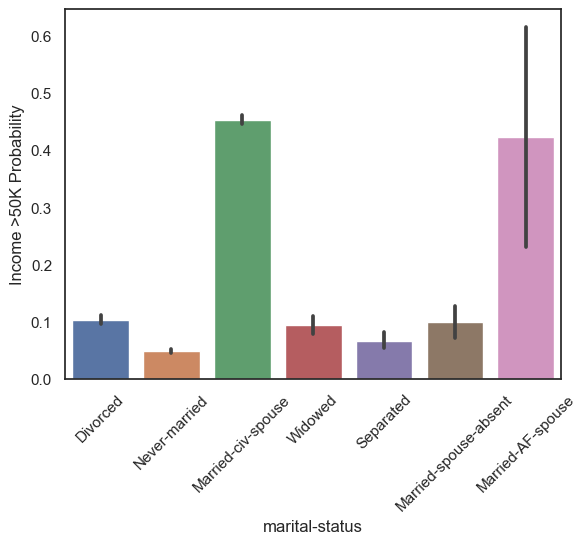

In [165]:
g = sns.barplot(x="marital-status",y="income",data=data_train)
g = g.set_ylabel("Income >50K Probability")
plt.xticks(rotation=45)
plt.show()

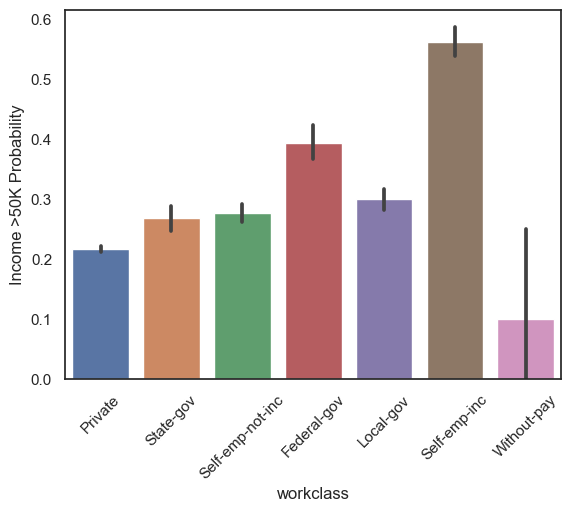

In [166]:
g = sns.barplot(x="workclass",y="income",data=data_train)
g = g.set_ylabel("Income >50K Probability")
plt.xticks(rotation=45)
plt.show()

# hot encoding

In [ ]:
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

In [23]:
df = pd.get_dummies(data_train, columns = cat_features)

In [24]:
df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,366425,16,99999,0,60,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,17,244602,8,0,0,15,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,31,174201,13,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,58,110199,4,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,25,149248,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,68982,13,0,0,50,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
43953,19,116562,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
43954,30,197947,10,0,0,58,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
43955,46,97883,13,0,0,35,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Data splitting

In [33]:
X = df.drop("income",axis=1)
y = df["income"]

In [34]:
from sklearn.preprocessing import StandardScaler

In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.1, random_state=101)

In [39]:
scaler = StandardScaler()

In [40]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Classification models

In [41]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score
def classifier(model,train_x,train_y,test_x,test_y):
    clf=model
    name=str(model)
    clf.fit(train_x,train_y)
    predicted=clf.predict(test_x)
    prec=precision_score(test_y,predicted)
    rec=recall_score(test_y,predicted)
    acc=accuracy_score(test_y,predicted)
    f1=f1_score(test_y,predicted)
    cm=confusion_matrix(test_y,predicted)
    print(f"Following are the results of the {name}:\naccuracy: {acc*100}\nprecision: {prec*100}\nrecall: {rec*100}\nf1 score: {f1*100}\n\n")
    print(f"The confusion matrix is as follow\n\n {cm}\n\n************************")

In [91]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100, max_features=3)))


In [92]:
for _,model in models:
    classifier(model,scaled_X_train,y_train,scaled_X_test,y_test)

Following are the results of the LogisticRegression():
accuracy: 82.26674641148325
precision: 80.99857346647646
recall: 84.5192021434951
f1 score: 82.72144522144522


The confusion matrix is as follow

 [[2663  666]
 [ 520 2839]]

************************
Following are the results of the LinearDiscriminantAnalysis():
accuracy: 81.45933014354067
precision: 78.7516960651289
recall: 86.39476034534087
f1 score: 82.39636570130607


The confusion matrix is as follow

 [[2546  783]
 [ 457 2902]]

************************
Following are the results of the KNeighborsClassifier():
accuracy: 83.76196172248804
precision: 80.29858704345509
recall: 89.66954450729384
f1 score: 84.72573839662448


The confusion matrix is as follow

 [[2590  739]
 [ 347 3012]]

************************
Following are the results of the DecisionTreeClassifier():
accuracy: 92.47906698564593
precision: 88.46982758620689
recall: 97.76719261685025
f1 score: 92.88643756187244


The confusion matrix is as follow

 [[2901  428]


### Using the Cross Validation Technique to get efficient results and getting the final results 

In [93]:
from sklearn.model_selection import cross_val_predict
def cv(models,train_X,train_Y,test_Y,scoring):
    results=[]
    names=[]
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=7, shuffle=True)
        cv_results = cross_val_score(model, train_X, train_Y, cv=kfold, scoring=scoring)
        y_pred = cross_val_predict(model, train_X, train_Y, cv=kfold)
        cm=confusion_matrix(train_Y,y_pred)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f with standard deviation (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
        print(f"The {scoring} of {name}\n\n",msg,"\n\n",f"----------------\nThe confusion matrix of {name} is \n\n{cm}\n\n********** ")

In [94]:
cv(models,scaled_X_train,y_train,y_test,"accuracy")

The accuracy of LR

 LR: 82.091710 with standard deviation (0.487472) 

 ----------------
The confusion matrix of LR is 

[[24071  6039]
 [ 4740 25340]]

********** 
The accuracy of LDA

 LDA: 80.747632 with standard deviation (0.568230) 

 ----------------
The confusion matrix of LDA is 

[[22906  7204]
 [ 4384 25696]]

********** 
The accuracy of KNN

 KNN: 82.897491 with standard deviation (0.574962) 

 ----------------
The confusion matrix of KNN is 

[[23102  7008]
 [ 3286 26794]]

********** 
The accuracy of CART

 CART: 91.897325 with standard deviation (0.305269) 

 ----------------
The confusion matrix of CART is 

[[25994  4116]
 [  790 29290]]

********** 
The accuracy of NB

 NB: 68.577837 with standard deviation (0.966762) 

 ----------------
The confusion matrix of NB is 

[[12880 17230]
 [ 1683 28397]]

********** 
The accuracy of RF

 RF: 92.955640 with standard deviation (0.327933) 

 ----------------
The confusion matrix of RF is 

[[26529  3581]
 [  666 29414]]

****

In [95]:
cv(models,scaled_X_train,y_train,y_test,"precision")

The precision of LR

 LR: 80.757275 with standard deviation (0.647720) 

 ----------------
The confusion matrix of LR is 

[[24071  6039]
 [ 4740 25340]]

********** 
The precision of LDA

 LDA: 78.106548 with standard deviation (0.704632) 

 ----------------
The confusion matrix of LDA is 

[[22906  7204]
 [ 4384 25696]]

********** 
The precision of KNN

 KNN: 79.273029 with standard deviation (0.860119) 

 ----------------
The confusion matrix of KNN is 

[[23102  7008]
 [ 3286 26794]]

********** 
The precision of CART

 CART: 87.733091 with standard deviation (0.543828) 

 ----------------
The confusion matrix of CART is 

[[25960  4150]
 [  773 29307]]

********** 
The precision of NB

 NB: 62.248485 with standard deviation (1.048339) 

 ----------------
The confusion matrix of NB is 

[[12880 17230]
 [ 1683 28397]]

********** 
The precision of RF

 RF: 89.175725 with standard deviation (0.540922) 

 ----------------
The confusion matrix of RF is 

[[26531  3579]
 [  662 29418]]

In [96]:
cv(models,scaled_X_train,y_train,y_test,"f1")

The f1 of LR

 LR: 82.461728 with standard deviation (0.432452) 

 ----------------
The confusion matrix of LR is 

[[24071  6039]
 [ 4740 25340]]

********** 
The f1 of LDA

 LDA: 81.600624 with standard deviation (0.495893) 

 ----------------
The confusion matrix of LDA is 

[[22906  7204]
 [ 4384 25696]]

********** 
The f1 of KNN

 KNN: 83.885130 with standard deviation (0.536125) 

 ----------------
The confusion matrix of KNN is 

[[23102  7008]
 [ 3286 26794]]

********** 
The f1 of CART

 CART: 92.298464 with standard deviation (0.236360) 

 ----------------
The confusion matrix of CART is 

[[25980  4130]
 [  777 29303]]

********** 
The f1 of NB

 NB: 75.019875 with standard deviation (0.683187) 

 ----------------
The confusion matrix of NB is 

[[12880 17230]
 [ 1683 28397]]

********** 
The f1 of RF

 RF: 93.322872 with standard deviation (0.345946) 

 ----------------
The confusion matrix of RF is 

[[26539  3571]
 [  685 29395]]

********** 


In [97]:
cv(models,scaled_X_train,y_train,y_test,"recall")

The recall of LR

 LR: 84.243015 with standard deviation (0.447850) 

 ----------------
The confusion matrix of LR is 

[[24071  6039]
 [ 4740 25340]]

********** 
The recall of LDA

 LDA: 85.424857 with standard deviation (0.398515) 

 ----------------
The confusion matrix of LDA is 

[[22906  7204]
 [ 4384 25696]]

********** 
The recall of KNN

 KNN: 89.076390 with standard deviation (0.686705) 

 ----------------
The confusion matrix of KNN is 

[[23102  7008]
 [ 3286 26794]]

********** 
The recall of CART

 CART: 97.418192 with standard deviation (0.267893) 

 ----------------
The confusion matrix of CART is 

[[26005  4105]
 [  774 29306]]

********** 
The recall of NB

 NB: 94.405934 with standard deviation (0.355080) 

 ----------------
The confusion matrix of NB is 

[[12880 17230]
 [ 1683 28397]]

********** 
The recall of RF

 RF: 97.786563 with standard deviation (0.310486) 

 ----------------
The confusion matrix of RF is 

[[26534  3576]
 [  670 29410]]

********** 


# Classfication models with hyperparameter tuning

In [44]:
print("\n********** Random Forest Classifier ***********\n")

print("\n********** Using Hyperparameter Tuning  ***********\n")

rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}


# Random search of parameters, using 5 fold cross validation,
RFC = GridSearchCV(rfc, param_grid, cv=5)
RFC.fit(scaled_X_train, y_train)
print("Best hyperparameters:", RFC.best_params_)
prediction_RFC = RFC.predict(scaled_X_test)
print("Accuracy Score:\n",accuracy_score(y_test, prediction_RFC))
print("Confusion Matrix:\n", confusion_matrix(y_test,prediction_RFC))
print("Classification Report:\n", classification_report(y_test,prediction_RFC))


********** Random Forest Classifier ***********


********** Using Hyperparameter Tuning  ***********

Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy Score:
 0.9332462869267178
Confusion Matrix:
 [[2735  336]
 [  73 2983]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      3071
           1       0.90      0.98      0.94      3056

    accuracy                           0.93      6127
   macro avg       0.94      0.93      0.93      6127
weighted avg       0.94      0.93      0.93      6127



In [45]:
print("\n********** Decision Tree Classifier ***********\n")
print("\n********** Using Hyperparameter Tuning ***********\n")
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

DT = DecisionTreeClassifier()

# Perform grid search using 5-fold cross validation
grid_search_DT = GridSearchCV(DT, param_grid, cv=5)
grid_search_DT.fit(scaled_X_train, y_train)
print("Best Hyperparameters:", grid_search_DT.best_params_)
prediction_grid_search_DT=grid_search_DT.predict(scaled_X_test)
print("Accuracy Score:\n", accuracy_score(y_test,prediction_grid_search_DT))
print("Confusion Matrix:\n", confusion_matrix(y_test,prediction_grid_search_DT))
print("Classification Report:\n", classification_report(y_test,prediction_grid_search_DT))


********** Decision Tree Classifier ***********


********** Using Hyperparameter Tuning ***********

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy Score:
 0.8351558674718459
Confusion Matrix:
 [[2357  714]
 [ 296 2760]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.82      3071
           1       0.79      0.90      0.85      3056

    accuracy                           0.84      6127
   macro avg       0.84      0.84      0.83      6127
weighted avg       0.84      0.84      0.83      6127



In [42]:
print("\n********** K-Nearest Neighbors ***********\n")
print("\n********** Using Hyperparameter Tuning ***********\n")
KNN = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance']}

# Perform the grid search using 5 fold cross validations
grid_search_KNN = GridSearchCV(KNN, param_grid, cv=5)
grid_search_KNN.fit(scaled_X_train, y_train)
print("Best Hyperparameters:", grid_search_KNN.best_params_)
prediction_grid_search_KNN=grid_search_KNN.predict(scaled_X_test)
print("Accuracy Score:\n", accuracy_score(y_test,prediction_grid_search_KNN))
print("Confusion Matrix:\n", confusion_matrix(y_test,prediction_grid_search_KNN))
print("Classification Report:\n", classification_report(y_test,prediction_grid_search_KNN))


********** K-Nearest Neighbors ***********


********** Using Hyperparameter Tuning ***********

Best Hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
Accuracy Score:
 0.8919536477884772
Confusion Matrix:
 [[2480  591]
 [  71 2985]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88      3071
           1       0.83      0.98      0.90      3056

    accuracy                           0.89      6127
   macro avg       0.90      0.89      0.89      6127
weighted avg       0.90      0.89      0.89      6127



In [43]:
print("\n********** Logistic Regression ***********\n")
print("\n********** Using Hyperparameter Tuning ***********\n")

params = {
    'penalty': ['l1', 'l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga']
}

LR = LogisticRegression()

grid_search = GridSearchCV(LR, params, cv=5)
grid_search.fit(scaled_X_train, y_train)

best_params = grid_search.best_params_

# Train logistic regression model with best hyperparameters
Lr = LogisticRegression(**best_params)
Lr.fit(scaled_X_train, y_train)
prediction_Lr = Lr.predict(scaled_X_test)
print("Best hyperparameters:\n", best_params)
print("Accuracy Score:\n", accuracy_score(y_test,prediction_Lr))
print("Confusion Matrix:\n", confusion_matrix(y_test,prediction_Lr))
print("Classification Report:\n", classification_report(y_test,prediction_Lr))


********** Logistic Regression ***********


********** Using Hyperparameter Tuning ***********

Best hyperparameters:
 {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy Score:
 0.8296066590501061
Confusion Matrix:
 [[2487  584]
 [ 460 2596]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      3071
           1       0.82      0.85      0.83      3056

    accuracy                           0.83      6127
   macro avg       0.83      0.83      0.83      6127
weighted avg       0.83      0.83      0.83      6127



## As we can see that the RandomForestClassifier gave the maximum accuracy (93 %) and F1-score =(0.93) with Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}, we will choose it for predicting class levels of test_data

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier(max_depth=None,n_estimators=50,min_samples_split= 2)
rfc.fit(scaled_X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [111]:
data_test=pd.read_csv("test (1).csv")

In [112]:
#hot encoding of test_data as model was trained with encoded train data
data_test=pd.get_dummies(data_test, columns = cat_features)

In [113]:
lst=[]
for i in df.columns:
    if i not in data_test.columns:
        lst.append(i)

In [119]:
data_test.drop(columns=['income'],axis=1,inplace=True)

In [121]:
test_pred=rfc.predict(data_test)

In [122]:
df_pred=pd.DataFrame(test_pred,columns=['Pred_level'])

In [124]:
df_pred.T

,0,1,2,3,4,5,6,7,8,9,...,889,890,891,892,893,894,895,896,897,898
Pred_level,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0


In [125]:
df_pred.to_csv('final_test_level_pred.csv')